In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [55]:
trn_id=pd.read_csv('train_identity.csv') 
trn_trans=pd.read_csv('train_transaction.csv')

In [56]:
trn_data=pd.merge(trn_id, trn_trans, on='TransactionID', how='outer')

In [57]:
print(trn_data.shape)

(590540, 434)


In [58]:
import gc
del trn_id,trn_trans
gc.collect()

758

In [59]:
trn_data.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
x=trn_data[trn_data["isFraud"].notna()]

In [61]:
x["isFraud"].head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [62]:
del trn_data
gc.collect()

88

In [63]:
y=x.pop("isFraud")

In [64]:
z=x.pop("TransactionID")
del z
gc.collect()

44

In [65]:
x.shape


(590540, 432)

In [66]:
x.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
ff=[c for c in x.columns if  x[c].isnull().sum() < 0.80 * x.shape[0]]

In [69]:
print(len(ff))

358


In [70]:
cat_col= [c for c in ff if
                   x[c].dtype == "object"]

# Select numerical columns
num_col = [c for c in ff if 
                  c not in cat_col]

In [71]:
print(cat_col)

['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']


In [72]:
tst_id=pd.read_csv('test_identity.csv') 
tst_trans=pd.read_csv('test_transaction.csv')
tst_data=pd.merge(tst_id, tst_trans, on='TransactionID', how='outer')
del tst_id,tst_trans
gc.collect()

0

In [73]:
trans_id=tst_data.pop("TransactionID")

In [74]:
tst_data.rename({'id-01':'id_01','id-02':'id_02','id-03':'id_03','id-04':'id_04','id-05':'id_05','id-06':'id_06','id-07':'id_07','id-08':'id_08','id-09':'id_09','id-10':'id_10','id-11':'id_11','id-12':'id_12','id-13':'id_13','id-14':'id_14','id-15':'id_15','id-16':'id_16','id-17':'id_17','id-18':'id_18','id-19':'id_19','id-20':'id_20','id-21':'id_21','id-22':'id_22','id-23':'id_23','id-24':'id_24','id-25':'id_25','id-26':'id_26','id-27':'id_27','id-28':'id_28','id-29':'id_29','id-30':'id_30','id-31':'id_31', 'id-32':'id_32', 'id-33':'id_33', 'id-34':'id_34', 'id-35':'id_35', 'id-36':'id_36', 'id-37':'id_37', 'id-38':'id_38'}, axis=1, inplace=True)

In [75]:
tst_data.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,310.0,90.0,0.0,310.0,90.0,0.0,0.0,0.0
2,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
x=pd.concat((x[cat_col],x[num_col]),axis=1)

In [77]:
x.head()

,id_12,id_15,id_16,id_28,id_29,id_31,id_35,id_36,id_37,id_38,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,NotFound,New,NotFound,New,NotFound,samsung browser 6.2,T,F,T,T,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,NotFound,New,NotFound,New,NotFound,mobile safari 11.0,T,F,F,T,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,NotFound,Found,Found,Found,Found,chrome 62.0,F,F,T,T,...,90.327904,90.327904,90.327904,90.327904,0.0,0.0,0.0,75.887497,75.887497,75.887497
3,NotFound,New,NotFound,New,NotFound,chrome 62.0,F,F,T,T,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,NotFound,Found,Found,Found,Found,chrome 62.0,T,F,T,T,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [78]:
x.shape

(590540, 358)

In [79]:
tst_out=pd.concat((tst_data[cat_col],tst_data[num_col]),axis=1)

In [80]:
tst_out.head()

,id_12,id_15,id_16,id_28,id_29,id_31,id_35,id_36,id_37,id_38,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,NotFound,New,NotFound,New,NotFound,chrome 67.0 for android,F,F,T,F,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.000,0.000,0.000
1,Found,Found,Found,Found,Found,chrome 67.0 for android,T,F,T,T,...,90.0,60.0,310.0,130.0,0.0,0.0,0.0,0.000,0.000,0.000
2,NotFound,New,NotFound,New,NotFound,ie 11.0 for tablet,F,T,T,F,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.000,0.000,0.000
3,NotFound,Found,Found,Found,Found,chrome 67.0 for android,F,F,T,F,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,6.271,6.271,6.271
4,NotFound,New,NotFound,New,NotFound,chrome 67.0 for android,F,F,T,F,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.000,0.000,0.000


In [82]:
tst_out.shape

(506691, 358)

In [83]:
transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(sparse=False,handle_unknown='ignore'),
    #OrdinalEncoder()
)

preprocessor = make_column_transformer(
    (transformer_num, num_col),
    (transformer_cat, cat_col),
)

In [84]:
x_train, x_valid, y_train, y_valid = \
    train_test_split(x, y, stratify=y, train_size=0.75)
del x,y

x_train = preprocessor.fit_transform(x_train)
x_valid = preprocessor.transform(x_valid)


In [85]:
ftst_out=preprocessor.transform(tst_out)

In [86]:
ftst_out.shape

(506691, 2312)

In [87]:
x_train.shape

(442905, 2312)

In [88]:
x_valid.shape

(147635, 2312)

In [89]:
del tst_out
gc.collect()

158

In [90]:
df=pd.DataFrame(x_train)
df.to_csv('x_train.csv',index=False)
df=pd.DataFrame(x_valid)
df.to_csv('x_valid.csv',index=False)
df=pd.DataFrame(y_train)
df.to_csv('y_train.csv',index=False)
df=pd.DataFrame(y_valid)
df.to_csv('y_valid.csv',index=False)
df=pd.DataFrame(trans_id)
df.to_csv('trans_id.csv',index=False)
df=pd.DataFrame(ftst_out)
df.to_csv('ftst_out.csv',index=False)

In [91]:
input_shape = [x_train.shape[1]]

In [92]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([layers.BatchNormalization(input_shape=input_shape),
                         layers.Dense(256,activation='relu'),
                         layers.BatchNormalization(),
                         layers.Dropout(0.3),
                         layers.Dense(256,activation='relu'),
                         layers.BatchNormalization(),
                          layers.Dropout(0.3),
                          layers.Dense(128,activation='relu'),
                         layers.BatchNormalization(),
                          layers.Dropout(0.3),
                          layers.Dense(1,activation="sigmoid")
                         ])

In [93]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC']
 )

In [94]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
lr_schedule = keras.callbacks.ReduceLROnPlateau(
    patience=0,
    factor=0.2,
    min_lr=0.001,
)

In [95]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=1024,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
433/433 [==============================] - 16s 33ms/step - loss: 0.3915 - auc: 0.6598 - val_loss: 0.1118 - val_auc: 0.8487
Epoch 2/200
433/433 [==============================] - 13s 30ms/step - loss: 0.1110 - auc: 0.8422 - val_loss: 0.1052 - val_auc: 0.8540
Epoch 3/200
433/433 [==============================] - 13s 29ms/step - loss: 0.1025 - auc: 0.8646 - val_loss: 0.1002 - val_auc: 0.8779
Epoch 4/200
433/433 [==============================] - 13s 29ms/step - loss: 0.0965 - auc: 0.8767 - val_loss: 0.0959 - val_auc: 0.8838
Epoch 5/200
433/433 [==============================] - 13s 30ms/step - loss: 0.0930 - auc: 0.8895 - val_loss: 0.0922 - val_auc: 0.8916
Epoch 6/200
433/433 [==============================] - 13s 30ms/step - loss: 0.0914 - auc: 0.8920 - val_loss: 0.0887 - val_auc: 0.8971
Epoch 7/200
433/433 [==============================] - 13s 29ms/step - loss: 0.0871 - auc: 0.9009 - val_loss: 0.0881 - val_auc: 0.8996
Epoch 8/200
433/433 [==============================] - 

In [96]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

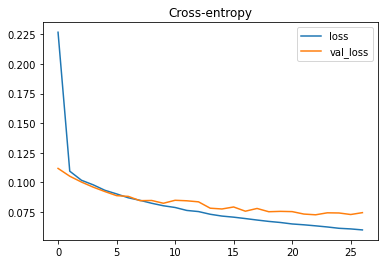

In [98]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
z=history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")


In [100]:
del x_train,x_valid,y_train,y_valid,history_df
gc.collect()

5344

In [101]:
tst_pred=model.predict_proba(ftst_out)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [102]:
tst_pred.shape


(506691, 1)

In [47]:
tst_pred.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [103]:
tst_pred[:5]

array([[8.6894631e-04],
       [3.3048391e-03],
       [5.7883113e-05],
       [2.7492642e-04],
       [1.4041904e-01]], dtype=float32)

In [49]:
trans_id.shape

(506691,)

In [50]:
tst_pred[:6,0]

array([4.0445954e-02, 1.5503596e-06, 2.1747380e-02, 3.8120508e-02,
       6.7512447e-01, 3.2989562e-02], dtype=float32)

In [104]:
submission = pd.DataFrame({
    'TransactionID' : trans_id ,
    'isFraud' : tst_pred[:,0]
})

In [105]:
submission.to_csv('submission.csv', index=False)

In [106]:
submission.head()

,TransactionID,isFraud
0,3663586,0.000869
1,3663588,0.003305
2,3663597,0.000058
3,3663601,0.000275
4,3663602,0.140419
